(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6470 - loss: 0.0700
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8885 - loss: 0.0229
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9082 - loss: 0.0182
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9196 - loss: 0.0156
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9274 - loss: 0.0140
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9201 - loss: 0.0148
테스트 정확도: 0.9315000176429749


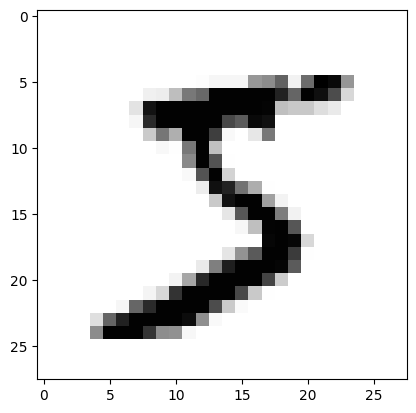

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels)	= tf.keras.datasets.mnist.load_data()

print(train_images.shape)

print(train_labels)
print(test_images.shape)

plt.imshow(train_images[0], cmap="Greys")

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['accuracy'])            

train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

#원핫 인코딩 부분
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

model.fit(train_images, train_labels, epochs=5, batch_size=512)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

plt.show()